In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.stats import uniform
from adaptive_mcmc import Gibbs_sampling

In [2]:
device1 = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
P = 1000
K = 5
N = 500

In [4]:
B_0 = np.random.binomial(1,1/3,(P,K)) * np.random.rand(P,K)
sigma2_0 = np.diag(uniform.rvs(loc = 0.1, scale = 0.9, size = P))
cov_0 = B_0 @ B_0.T + sigma2_0

In [5]:
X = np.random.multivariate_normal(np.zeros(P), cov_0, N)

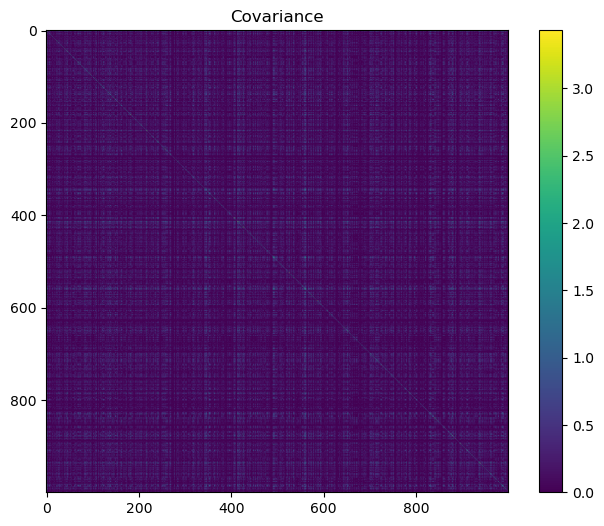

In [6]:
plt.figure(figsize=(8, 6))
plt.imshow(cov_0)
plt.colorbar()
plt.title("Covariance")
plt.show()

In [7]:
# B_sample, sigma2_sample = Gibbs_sampling(torch.from_numpy(X).to(device1))
A_mean, r_estimate = Gibbs_sampling(torch.from_numpy(X).to(device1))

100%|██████████| 24999/24999 [33:03<00:00, 12.60it/s] 


In [8]:
# A = torch.einsum('bij,bjk->bik',B_sample, B_sample.transpose(1,2))
# for i in range(1000):
#     A[i] = A[i] + torch.diag(sigma2_sample[i])

In [9]:
# A_mean = A.mean(0)

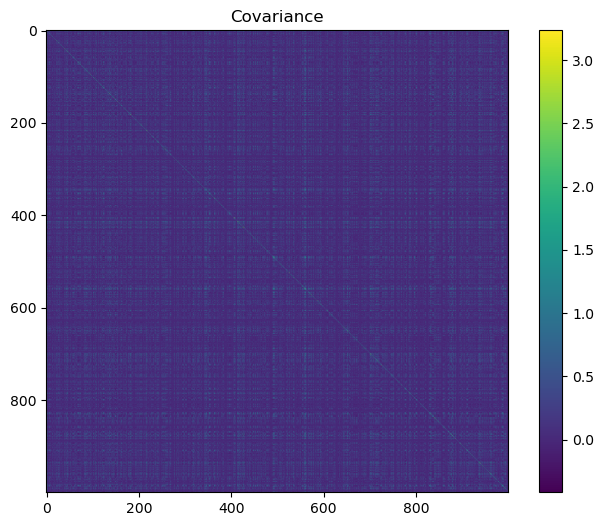

In [10]:
plt.figure(figsize=(8, 6))
plt.imshow(A_mean)
plt.colorbar()
plt.title("Covariance")
plt.show()

In [11]:
cov_true = torch.from_numpy(cov_0)

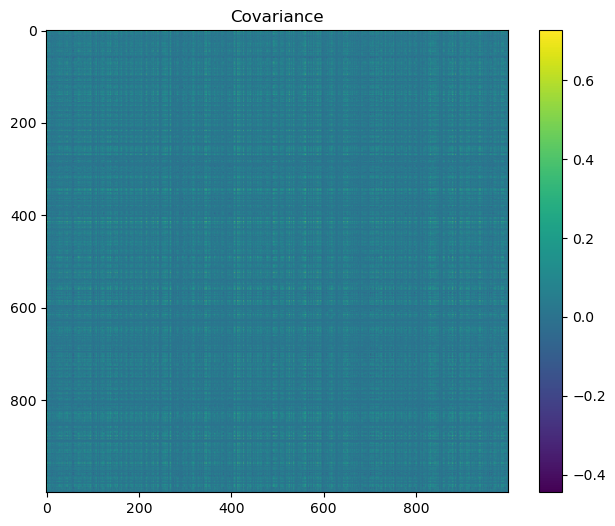

In [12]:
# 绘制残差图像
plt.figure(figsize=(8, 6))
plt.imshow(cov_true - A_mean)
plt.colorbar()
plt.title("Covariance")
plt.show()

In [13]:
(cov_true - A_mean).square().sum()/P**2

tensor(0.0051, dtype=torch.float64)

In [14]:
(cov_true - A_mean).abs().sum()/P**2

tensor(0.0471, dtype=torch.float64)

In [15]:
print(r_estimate)

49.00000000000008


In [16]:
# B_mean = B_sample.mean(0)

In [17]:
# for i in range(50):
    
#     print(B_mean[:,i].abs().sum())